# Testing Different Maximum Tree Depths when Using Decision Trees

###  Mike Bourne, August 2020





For this project I am going to use one of the inbuilt datasets to sklearn, iris. I'm going to test different maximum tree depths when using decision trees for classification.

The famous Iris database was first used by Sir R.A. Fisher and is perhaps the best known database to be found in the pattern recognition literature.  Fisher's paper is a classic in the field and is referenced frequently to this day. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

First I load the data.

In [115]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

iris = datasets.load_iris()
X = iris['data']
y = iris['target']
print(X[0:5], y[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] [0 0 0 0 0]


Next, I split the data into test and train arrays. I'm using a test split of 20%

In [86]:
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

I run the Decision Tree Classifier on the iris train dataset and evaluate the resulting model

maximum number of splits in the data... 5


[Text(148.8, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [41, 39, 40]'),
 Text(111.60000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(186.0, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 79\nvalue = [0, 39, 40]'),
 Text(148.8, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.169\nsamples = 43\nvalue = [0, 39, 4]'),
 Text(74.4, 90.6, 'X[3] <= 1.65\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(37.2, 54.359999999999985, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(111.60000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(223.20000000000002, 90.6, 'X[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(186.0, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(260.40000000000003, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(223.20000000000002, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [0

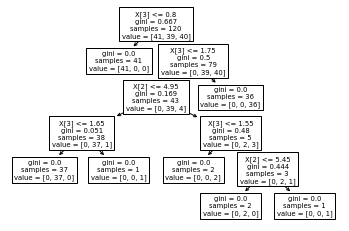

In [104]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
max_no = clf.get_depth()
print('maximum number of splits in the data...', max_no)
plot_tree(clf)

I use the model to predict the classification of the remaining test data and then compare these predictions to the real labels using a confusion matrix

In [105]:
prediction = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print('------confusion matrix------\n')
print(confusion_matrix(y_test,prediction))
print('\n------accuracy------\n')
print(round(accuracy_score(y_test,prediction),2))
print('\n------classification report------\n')
print(classification_report(y_test,prediction))

------confusion matrix------

[[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]

------accuracy------

0.97

------classification report------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.91      0.95        11
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Overall this approach has achieved a fanastic result when predicting the unseen iris data. The model has an accuracy of 97% with only 1 mis-classification.

This unconstrained application of the decision tree ML, produced 5 branches to the tree. Next, I will loop through testing an imposed fixed number of branches, from 1 to 5, to see if the model can have a lower number of branches without impacting on accuracy.


In [116]:
data = []
for i in range(1,max_no+1):
    clf2 = DecisionTreeClassifier(max_depth=i)
    clf2 = clf2.fit(X_train, y_train)
    prediction = clf2.predict(X_test)
    data.append(round(accuracy_score(y_test,prediction),3))
    print('for {0} branch(es), the accurancy is {1}'.format(i,round(data[i-1],2)))


for 1 branch(es), the accurancy is 0.63
for 2 branch(es), the accurancy is 0.93
for 3 branch(es), the accurancy is 0.97
for 4 branch(es), the accurancy is 0.97
for 5 branch(es), the accurancy is 0.97


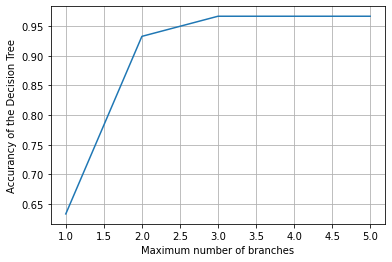

In [107]:
import matplotlib.pyplot as plt

plt.plot(range(1,max_no+1), data)
plt.xlabel('Maximum number of branches')
plt.ylabel('Accurancy of the Decision Tree')
plt.grid()

From the plot above it can be seen that the accuracy of the tree does not improve when the number of branches is greater than 3 (and arguably much above having 2 branches). 

This suggests that 3 branches is around the optimum number of splits and larger trees are simply overfitting the data.